# Linear Regression in Python

Dataset from Kaggle : **"Pokemon with stats"** by *Alberto Barradas*  
Source: https://www.kaggle.com/abcsds/pokemon (requires login)

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

### Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [2]:
pkmndata = pd.read_csv('pokemonData.csv')
pkmndata.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Description of the dataset, as available on Kaggle, is as follows.
Learn more : https://en.wikipedia.org/wiki/List_of_Pok%C3%A9mon

> **\#** : ID for each Pokemon (runs from 1 to 721)  
> **Name** : Name of each Pokemon  
> **Type 1** : Each Pokemon has a basic Type, this determines weakness/resistance to attacks  
> **Type 2** : Some Pokemons are dual type and have a Type 2 value (set to nan otherwise)  
> **Total** : Sum of all stats of a Pokemon, a general guide to how strong a Pokemon is  
> **HP** : Hit Points, defines how much damage a Pokemon can withstand before fainting  
> **Attack** : The base modifier for normal attacks by the Pokemon (e.g., scratch, punch etc.)  
> **Defense** : The base damage resistance of the Pokemon against normal attacks  
> **SP Atk** : Special Attack, the base modifier for special attacks (e.g. fire blast, bubble beam)  
> **SP Def** : Special Defense, the base damage resistance against special attacks  
> **Speed** : Determines which Pokemon attacks first each round  
> **Generation** : Each Pokemon belongs to a certain Generation  
> **Legendary** : Legendary Pokemons are powerful, rare, and hard to catch

---

Check the vital statistics of the dataset using the `type` and `shape` attributes.

In [3]:
print("Data type : ", type(pkmndata))
print("Data dims : ", pkmndata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (800, 13)


Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [4]:
print(pkmndata.dtypes)

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


---

## Uni-Variate Linear Regression

We will start by setting up a Uni-Variate Linear Regression problem.   

Response Variable : **Total**     
Predictor Feature : **HP**    

> Regression Model : Total = $a$ $\times$ HP + $b$  

Extract the variables and the associated data as a Pandas `DataFrame`.

In [5]:
total = pd.DataFrame(pkmndata['Total'])  # Response
hp = pd.DataFrame(pkmndata['HP'])        # Predictor

Set up the regression problem with Train and Test datasets.   
Train Set with 600 samples and Test Set with 200 samples.

In [6]:
# Train Set : 600 samples
hp_train = pd.DataFrame(hp[:600])
total_train = pd.DataFrame(total[:600])

# Test Set : 200 samples
hp_test = pd.DataFrame(hp[-200:])
total_test = pd.DataFrame(total[-200:])

# Check the sample sizes
print("Train Set :", hp_train.shape, total_train.shape)
print("Test Set  :", hp_test.shape, total_test.shape)

Train Set : (600, 1) (600, 1)
Test Set  : (200, 1) (200, 1)


#### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

In [7]:
# Summary Statistics for HP Train
hp_train.describe()

,HP
count,600.000000
mean,69.026667
std,26.611267
min,1.000000
25%,50.000000
50%,65.000000
75%,80.000000
max,255.000000


In [8]:
# Summary Statistics for Total Train
total_train.describe()

,Total
count,600.000000
mean,432.715000
std,122.365283
min,180.000000
25%,325.000000
50%,440.000000
75%,515.000000
max,780.000000


<AxesSubplot:>

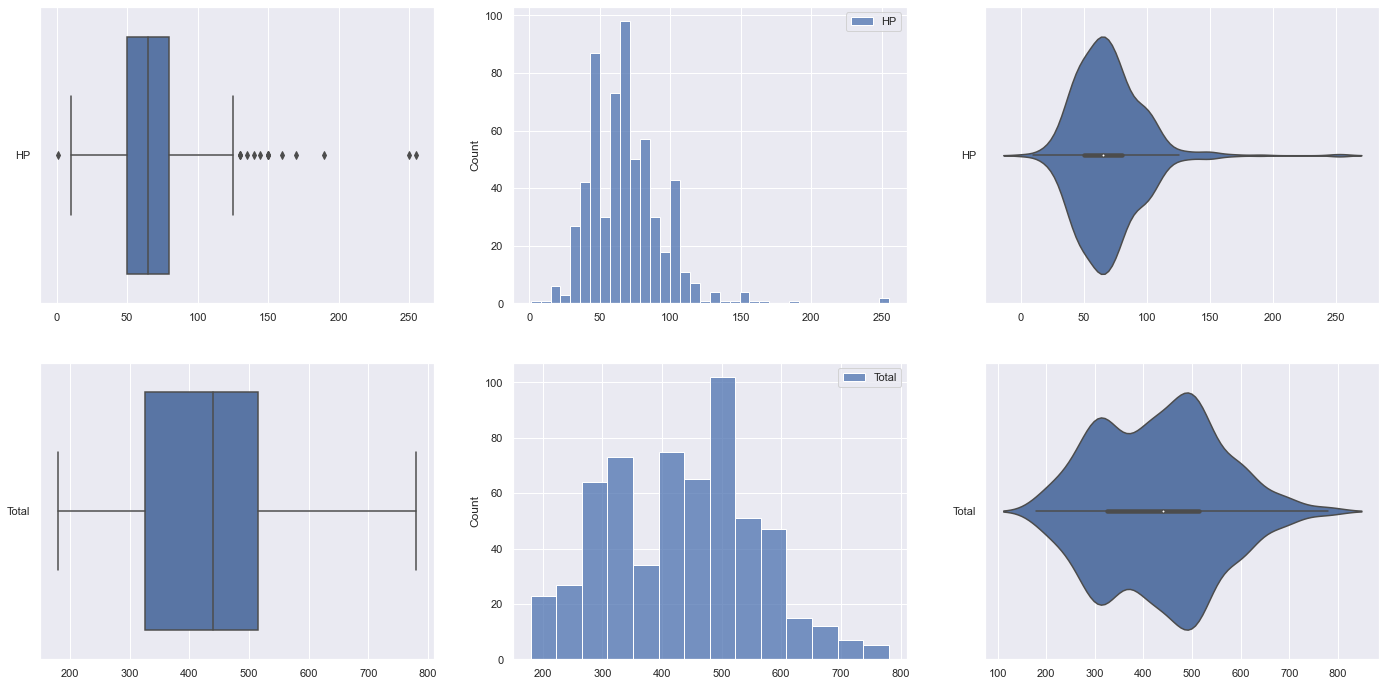

In [9]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP Train
sb.boxplot(data = hp_train, orient = "h", ax = axes[0,0])
sb.histplot(data = hp_train, ax = axes[0,1])
sb.violinplot(data = hp_train, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Total Train
sb.boxplot(data = total_train, orient = "h", ax = axes[1,0])
sb.histplot(data = total_train, ax = axes[1,1])
sb.violinplot(data = total_train, orient = "h", ax = axes[1,2])

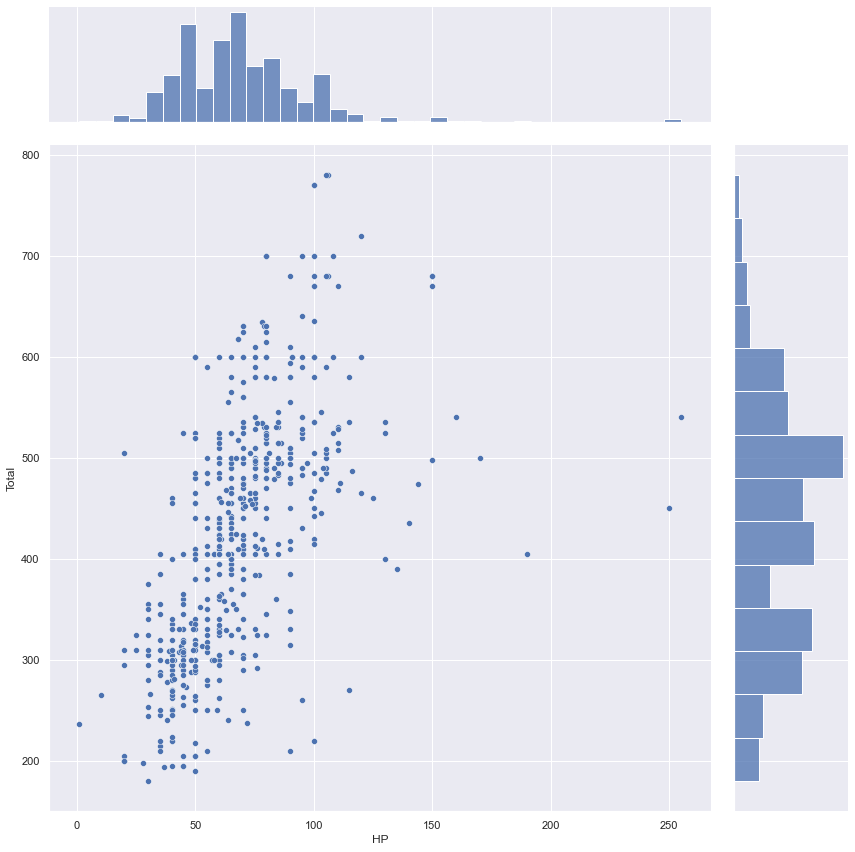

In [10]:
# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([hp_train, total_train], axis = 1).reindex(hp_train.index)

# Jointplot of Total Train against HP Train
sb.jointplot(data = trainDF, x = "HP", y = "Total", height = 12)

<AxesSubplot:>

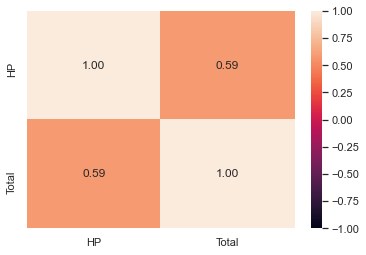

In [11]:
# Calculate the correlation between the two columns/variables
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

#### Linear Regression using Scikit-Learn

Scikit-Learn (`sklearn`) will be our de-facto Machine Learning library in Python.   
Import the `LinearRegression` model from `sklearn.linear_model`.

In [1]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

Train the Linear Regression model `linreg` using the Train Set.   
Use `hp_train` as *Predictor* and `total_train` as *Response*.

In [13]:
# Train the Linear Regression model
linreg.fit(hp_train, total_train)

LinearRegression()

You have *trained* the model to fit the following formula.

>  Regression Problem : Total = $a$ $\times$ HP + $b$

Check Intercept ($a$) and Coefficient ($b$) of the regression line.

In [14]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [245.18583183]
Coefficients 	: a =  [[2.71676407]]


Plot the regression line based on the coefficients-intercept form.

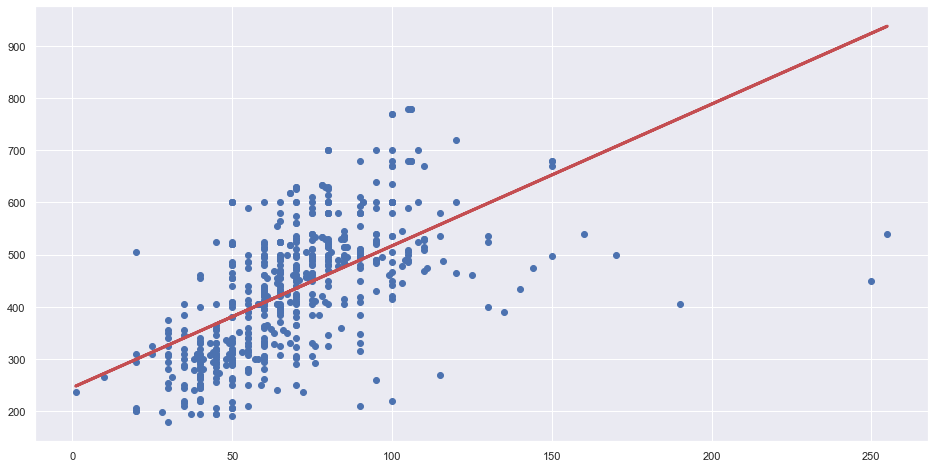

In [15]:
# Formula for the Regression line
regline_x = hp_train
regline_y = linreg.intercept_ + linreg.coef_ * hp_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(hp_train, total_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

Plot the regression line by prediction using the model.

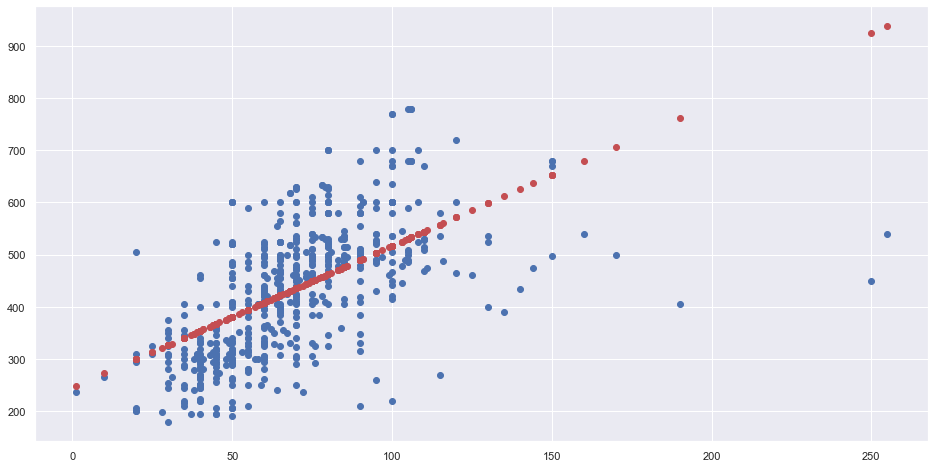

In [16]:
# Predict Total values corresponding to HP Train
total_train_pred = linreg.predict(hp_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(hp_train, total_train)
plt.scatter(hp_train, total_train_pred, color = "r")
plt.show()

#### Goodness of Fit of the Model

Check how good the predictions are on the Train Set.    
Metrics : Explained Variance and Mean Squared Error.

In [17]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(hp_train, total_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(total_train, total_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.34907482643576504
Mean Squared Error (MSE) 	: 9730.229398983363
Root Mean Squared Error (RMSE) 	: 98.64192515854181


Test the Linear Regression model `linreg` using the Test Set.   

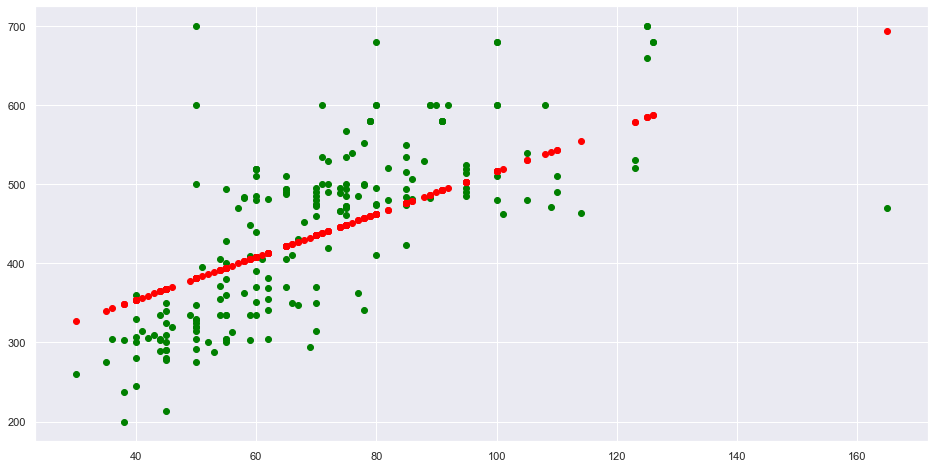

In [18]:
# Predict Total values corresponding to HP Test
total_test_pred = linreg.predict(hp_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(hp_test, total_test, color = "green")
plt.scatter(hp_test, total_test_pred, color = "red")
plt.show()

Check how good the predictions are on the Test Set.    
Metrics : Explained Variance and Mean Squared Error.

In [19]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(hp_test, total_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(total_test, total_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.49143196756646934
Mean Squared Error (MSE) 	: 6397.401764721521
Root Mean Squared Error (RMSE) 	: 79.98375938102386


#### Regression with Random Train-Test Split

Split the Train and Test sets randomly, and perform Linear Regression.

Intercept of Regression 	: b =  [230.18867803]
Coefficients of Regression 	: a =  [[2.94199668]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.39641102633295
Mean Squared Error (MSE) 	: 8761.182854726507

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.33985399999414934
Mean Squared Error (MSE) 	: 9206.558445982993



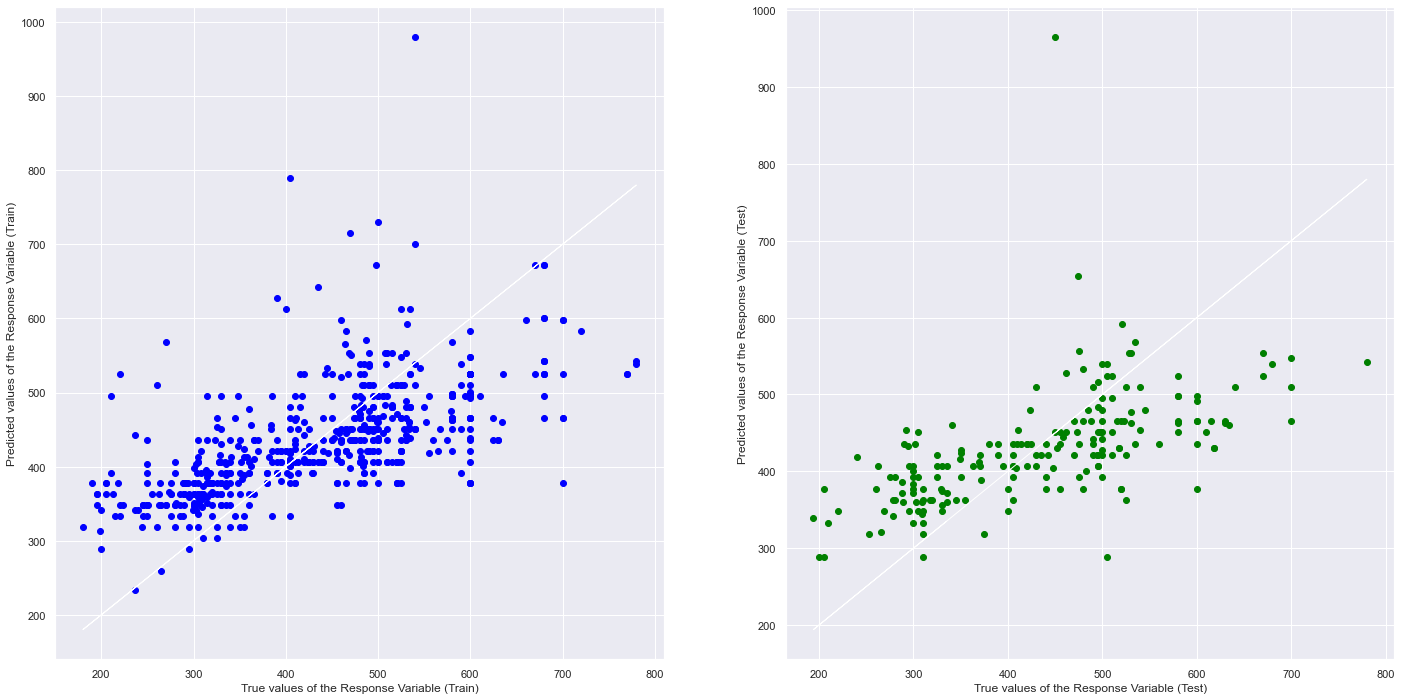

In [20]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Recall the Total-HP Dataset
total = pd.DataFrame(pkmndata['Total'])   # Response
hp = pd.DataFrame(pkmndata['HP'])         # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(hp, total, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

---

## Multi-Variate Linear Regression

We will start by setting up a Multi-Variate Linear Regression problem.   

Response Variable : **Total**     
Predictor Feature : **HP, Attack, Defense**       

> Regression Model : Total = $a_1$ $\times$ HP + $a_2$ $\times$ Attack + $a_3$ $\times$ Defense + $b$  

Extract the variables and the associated data as a Pandas `DataFrame`.

In [21]:
# Extract Response and Predictors
y = pd.DataFrame(pkmndata["Total"])
X = pd.DataFrame(pkmndata[["HP", "Attack", "Defense"]])

Set up the regression problem with Train and Test datasets.   

In [22]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (600, 1) (600, 3)
Test Set  : (200, 1) (200, 3)


#### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

In [23]:
# Summary Statistics for Response
y_train.describe()

,Total
count,600.000000
mean,433.245000
std,120.192048
min,180.000000
25%,330.000000
50%,441.000000
75%,510.000000
max,780.000000


In [24]:
# Summary Statistics for Predictors
X_train.describe()

,HP,Attack,Defense
count,600.000000,600.000000,600.000000
mean,68.401667,78.361667,73.765000
std,25.811251,32.661785,31.786849
min,1.000000,5.000000,5.000000
25%,50.000000,55.000000,50.000000
50%,65.000000,75.000000,70.000000
75%,80.000000,100.000000,90.000000
max,255.000000,180.000000,230.000000


<AxesSubplot:>

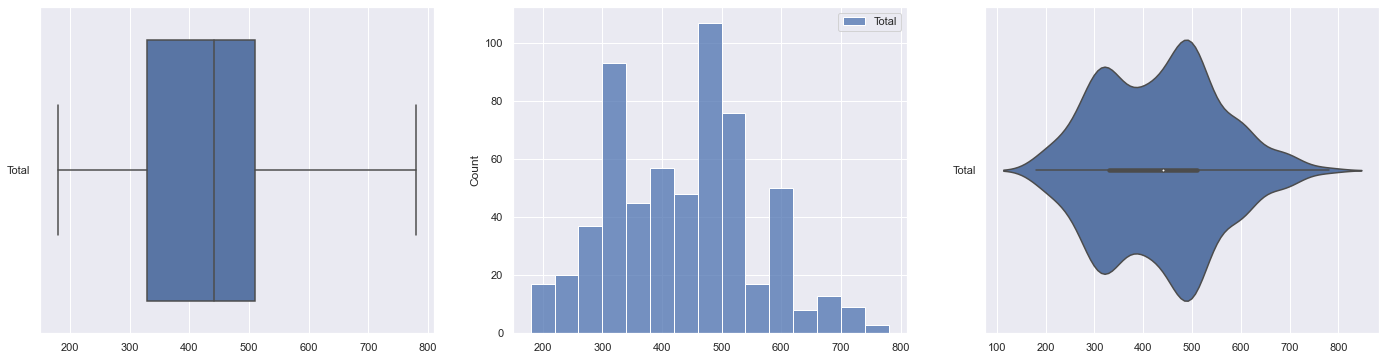

In [25]:
# Draw the distribution of Response
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = y_train, orient = "h", ax = axes[0])
sb.histplot(data = y_train, ax = axes[1])
sb.violinplot(data = y_train, orient = "h", ax = axes[2])

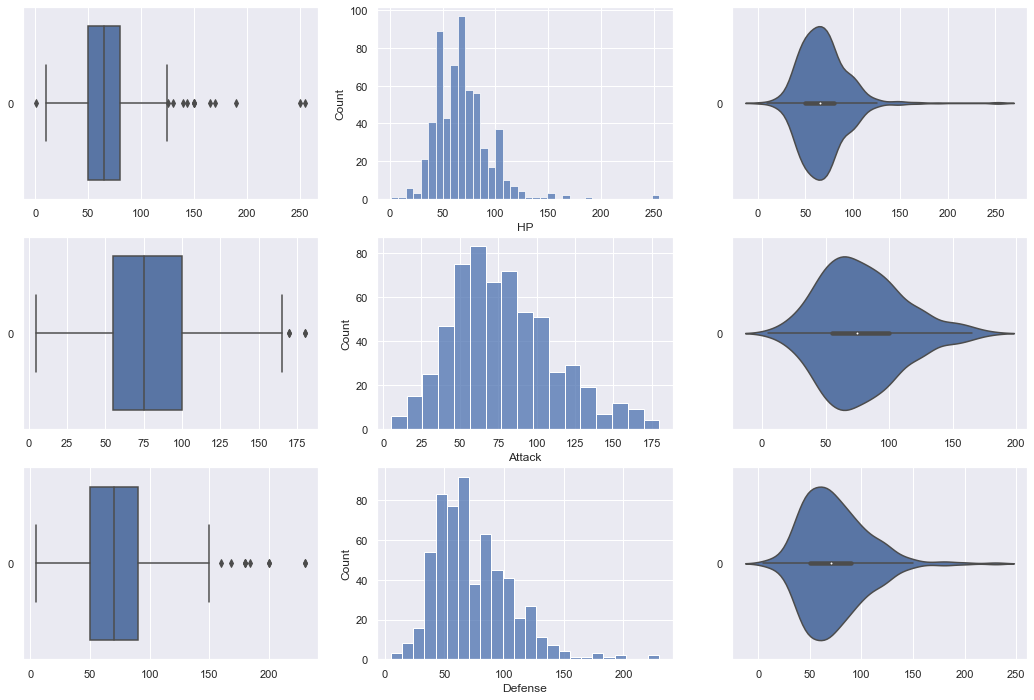

In [26]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(3, 3, figsize=(18, 12))

count = 0
for var in X_train:
    sb.boxplot(data = X_train[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = X_train[var], ax = axes[count,1])
    sb.violinplot(data = X_train[var], orient = "h", ax = axes[count,2])
    count += 1

<AxesSubplot:>

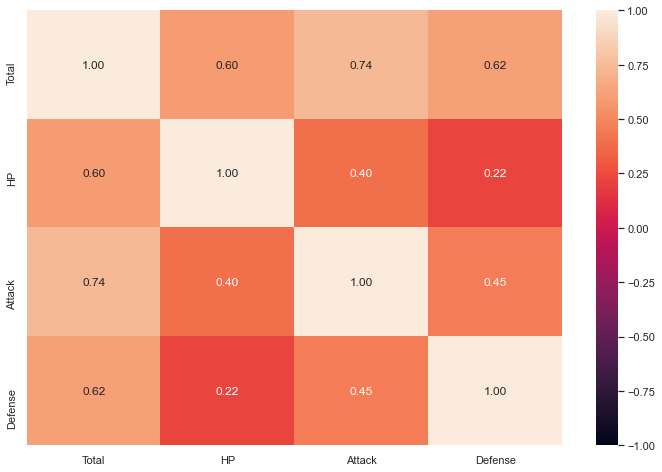

In [27]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

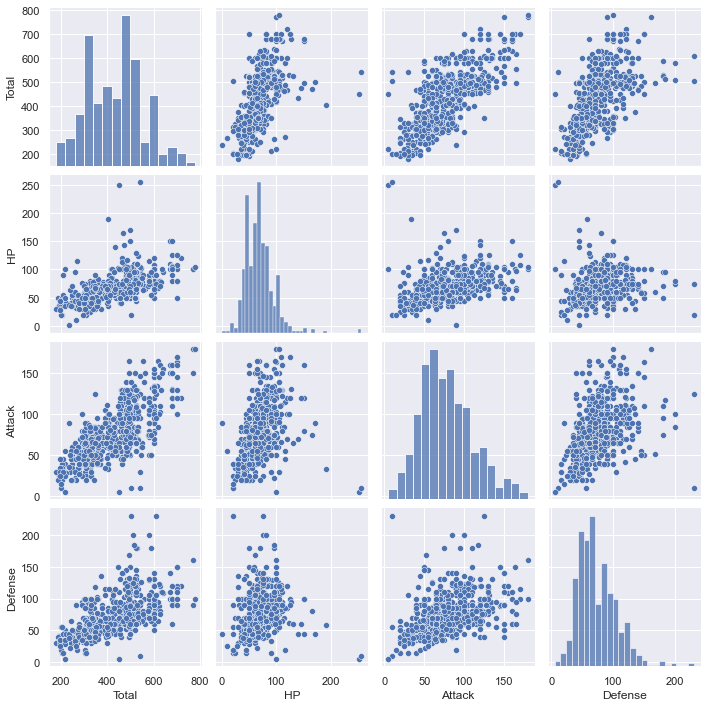

In [28]:
# Relationship between Response and the Predictors
sb.pairplot(data = trainDF)

#### Linear Regression using Scikit-Learn

In [29]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression


# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [100.22018997]
Coefficients of Regression 	: a =  [[1.61917547 1.63593064 1.27535088]]



,Predictors,Coefficients
0,HP,1.619175
1,Attack,1.635931
2,Defense,1.275351


Response Variable : **Total**     
Predictor Feature : **HP, Attack, Defense**       

> Regression Model : Total = $a_1$ $\times$ HP + $a_2$ $\times$ Attack + $a_3$ $\times$ Defense + $b$  

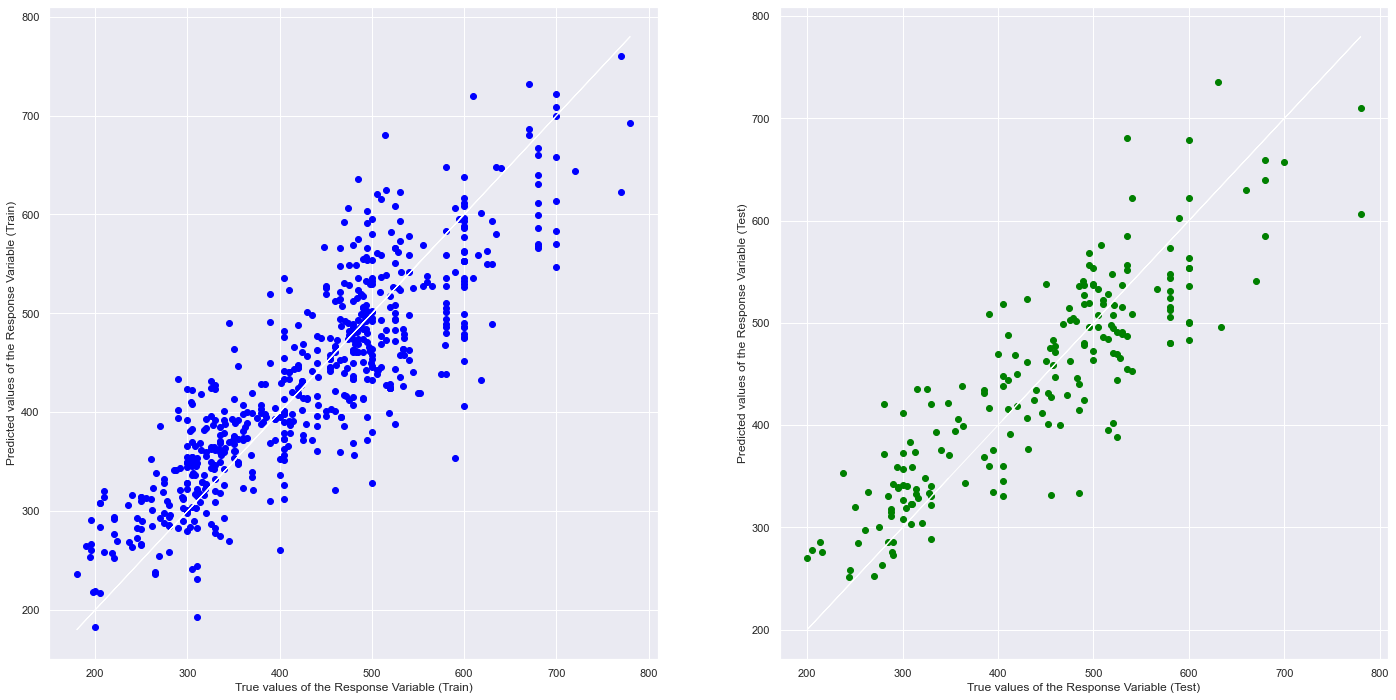

In [30]:
# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Goodness of Fit of the Model

In [31]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7439158212837238
Mean Squared Error (MSE) 	: 3693.2592500599317

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7577971498050018
Mean Squared Error (MSE) 	: 3435.649700667771



---

## Multi-Variate Linear Regression

Let us set up another Multi-Variate Linear Regression problem.   

Response Variable : **Total**     
Predictor Feature : **HP, Attack, Defense, Sp. Atk, Sp. Def, Speed**       

> Regression Model : Total = $a_1$ $\times$ HP + $a_2$ $\times$ Attack + $a_3$ $\times$ Defense + $a_4$ $\times$ Sp. Atk + $a_5$ $\times$ Sp. Def + $a_6$ $\times$ Speed + $b$  

Intercept of Regression 	: b =  [-3.41060513e-13]
Coefficients of Regression 	: a =  [[1. 1. 1. 1. 1. 1.]]

  Predictors  Coefficients
0         HP           1.0
1     Attack           1.0
2    Defense           1.0
3    Sp. Atk           1.0
4    Sp. Def           1.0
5      Speed           1.0



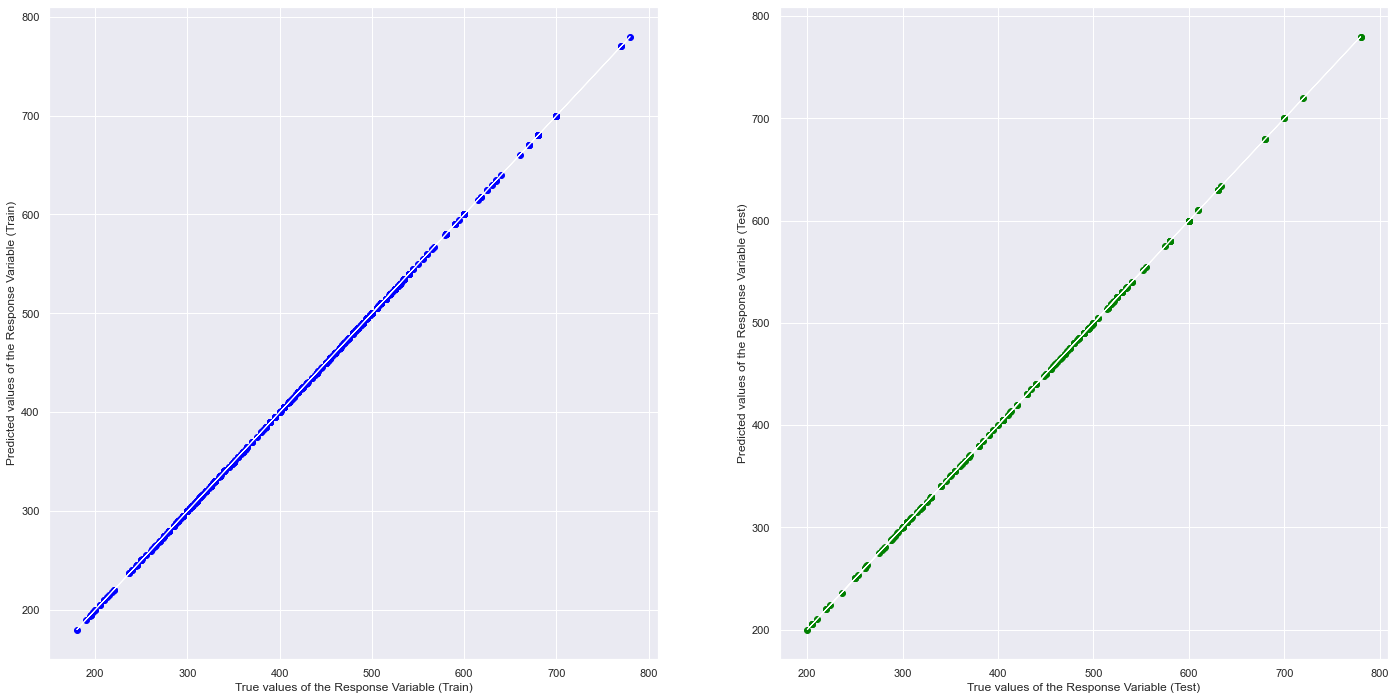

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 1.5059964733102487e-26

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 1.408388083970902e-26



In [32]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = pd.DataFrame(pkmndata["Total"])
X = pd.DataFrame(pkmndata[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

---

## Prediction using a Regression Model

Once we have trained a Multi-Variate Regression Model, we may use it to predict **Total** for any particular Pokemon.   

> Regression Model : Total = $a_1$ $\times$ HP + $a_2$ $\times$ Attack + $a_3$ $\times$ Defense + $b$  

Intercept of Regression 	: b =  [101.19308339]
Coefficients of Regression 	: a =  [[1.6553757  1.60247815 1.27598218]]

  Predictors  Coefficients
0         HP      1.655376
1     Attack      1.602478
2    Defense      1.275982



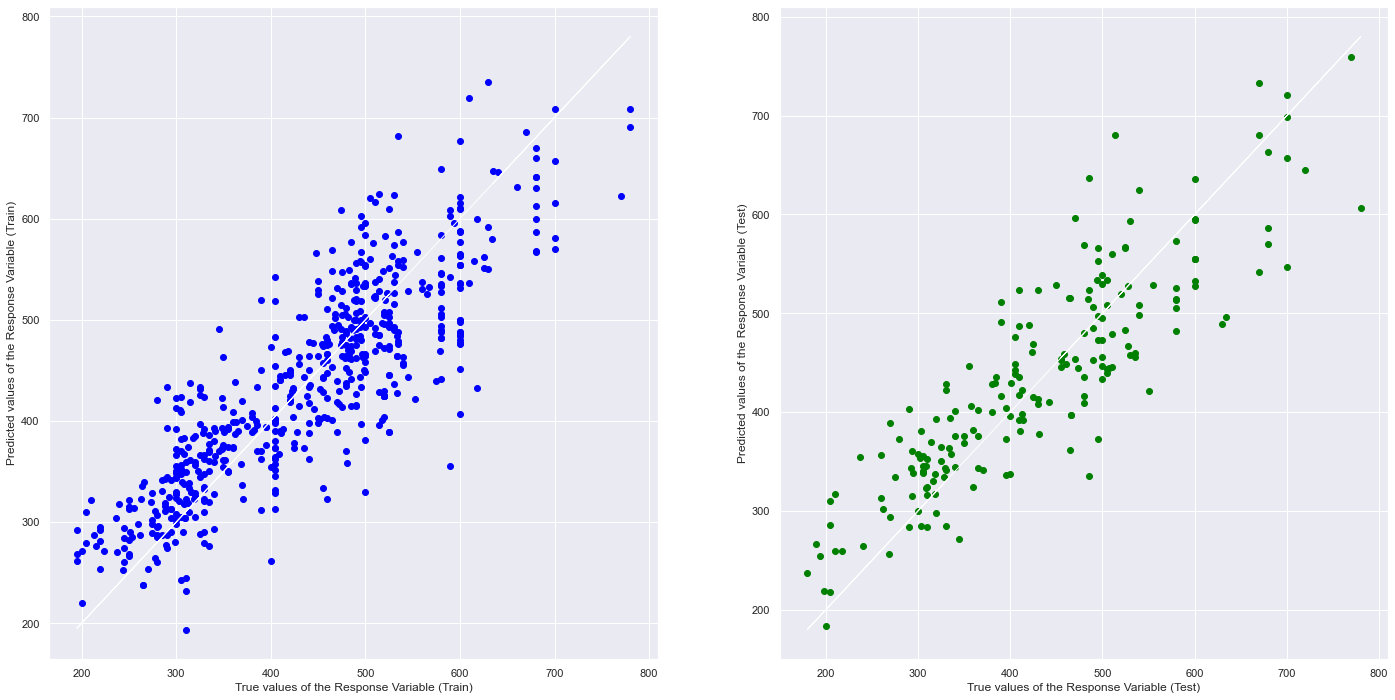

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7390830857323616
Mean Squared Error (MSE) 	: 3584.9263534553243

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7678331194974739
Mean Squared Error (MSE) 	: 3769.0248529993682



In [33]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
predictors = ["HP", "Attack", "Defense"]

y = pd.DataFrame(pkmndata["Total"])
X = pd.DataFrame(pkmndata[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

#### Prediction of Total

Let's predict the value of **Total** for a few specific Pokemons -- *Charizard*, *Snorlax* and *Vivillon* -- using the Regression Model derived above.   

In [34]:
# Extract Pokemons for Prediction
pkmndata_pred = pkmndata[pkmndata["Name"].isin(["Charizard", "Snorlax", "Vivillon"])]
pkmndata_pred

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
155,143,Snorlax,Normal,NaN,540,160,110,65,65,110,30,1,False
734,666,Vivillon,Bug,Flying,411,80,52,50,90,50,89,6,False


In [35]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(pkmndata_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = linreg.predict(X_pred)
y_pred

array([[464.4471628 ],
       [625.26463423],
       [380.75111242]])

In [36]:
# Summarize the Actuals, Predictions and Errors
y_pred = pd.DataFrame(y_pred, columns = ["PredTotal"], index = pkmndata_pred.index)
pkmndata_acc = pd.concat([pkmndata_pred[["Name", "Total"]], y_pred], axis = 1)

y_errs = 100 * abs(pkmndata_acc["Total"] - pkmndata_acc["PredTotal"]) / pkmndata_acc["Total"]
y_errs = pd.DataFrame(y_errs, columns = ["Error"], index = pkmndata_pred.index)
pkmndata_acc = pd.concat([pkmndata_acc, y_errs], axis = 1)

pkmndata_acc

,Name,Total,PredTotal,Error
6,Charizard,534,464.447163,13.024876
155,Snorlax,540,625.264634,15.789747
734,Vivillon,411,380.751112,7.359827


#### Prediction Interval

The confidence on Prediction depends on the Distribution and Deviation of the Errors in Prediction.    
We obtain the Mean Squared Error on the Train Set while fitting/training the Linear Regression Model.    

The Standard Error of Prediction may be estimated as $StdE = \sqrt{\frac{n}{n-2} MSE}$ from the Train Set.

In [37]:
MSE_train = mean_squared_error(y_train, y_train_pred)
StdE_pred = np.sqrt(len(y_train) * MSE_train/(len(y_train) - 2))

print("Mean Squared Error (MSE) \t:", MSE_train.round(2))
print("Pred Standard Error (SE) \t:", StdE_pred.round(2))

Mean Squared Error (MSE) 	: 3584.93
Pred Standard Error (SE) 	: 59.97


In Prediction, we assume a Gaussian (Normal) Distribution for Predictions Errors.    
The `95%` Prediction Interval for any data point is given by $Prediction \pm 1.96 \times StdE$    
The `99%` Prediction Interval for any data point is given by $Prediction \pm 2.58 \times StdE$

In [38]:
y_95l = pd.DataFrame(pkmndata_acc["PredTotal"] - 1.96*StdE_pred).rename(columns = {"PredTotal" : "95 Lower"})
y_95u = pd.DataFrame(pkmndata_acc["PredTotal"] + 1.96*StdE_pred).rename(columns = {"PredTotal" : "95 Upper"})
y_99l = pd.DataFrame(pkmndata_acc["PredTotal"] - 2.58*StdE_pred).rename(columns = {"PredTotal" : "99 Lower"})
y_99u = pd.DataFrame(pkmndata_acc["PredTotal"] + 2.58*StdE_pred).rename(columns = {"PredTotal" : "99 Upper"})

pkmndata_int = pd.concat([pkmndata_acc, y_95l, y_95u, y_99l, y_99u], axis = 1)
pkmndata_int

,Name,Total,PredTotal,Error,95 Lower,95 Upper,99 Lower,99 Upper
6,Charizard,534,464.447163,13.024876,346.897544,581.996781,309.713481,619.180844
155,Snorlax,540,625.264634,15.789747,507.715016,742.814253,470.530953,779.998316
734,Vivillon,411,380.751112,7.359827,263.201494,498.300731,226.017431,535.484794
